# Trapezoid Rule

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Trapezoids

The definite integral of $f(x)$ is equal to the (net) area under the curve $y=f(x)$ over the interval $[a,b]$. Riemann sums approximate definite integrals by using sums of rectangles to approximate the area.

The [trapezoid rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) gives a better approximation of a definite integral by summing the areas of the trapezoids connecting the points

$$
(x_{i-1},0), (x_i,0), (x_{i-1},f(x_{i-1})), (x_i,f(x_i))
$$

for each subinterval $[x_{i-1},x_i]$ of a partition. Note that the area of each trapezoid is the sum of a rectangle and a triangle

$$
(x_i - x_{i-1}) f(x_{i-1}) + \frac{1}{2}(x_i - x_{i-1}) (f(x_i) - f(x_{i-1})) = \frac{1}{2}(f(x_i) + f(x_{i-1}))(x_i - x_{i-1})
$$

For example, we can use a single trapezoid to approximate:

$$
\int_0^1 e^{-x^2} \, dx
$$

First, let's plot the curve $y = e^{-x^2}$ and the trapezoid on the interval $[0,1]$:

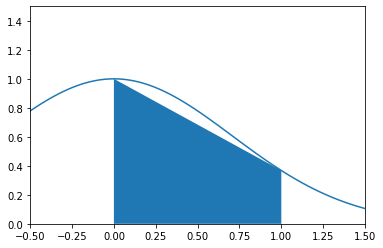

In [2]:
x = np.linspace(-0.5,1.5,100)
y = np.exp(-x**2)
plt.plot(x,y)

x0 = 0; x1 = 1;
y0 = np.exp(-x0**2); y1 = np.exp(-x1**2);
plt.fill_between([x0,x1],[y0,y1])

plt.xlim([-0.5,1.5]); plt.ylim([0,1.5]);
plt.show()

Approximate the integral by the area of the trapezoid:

In [3]:
A = 0.5*(y1 + y0)*(x1 - x0)
print("Trapezoid area:", A)

Trapezoid area: 0.6839397205857212


## Definition

The **trapezoid rule** for $N$ subintervals of $[a,b]$ of equal length is

$$
T_N(f) = \frac{\Delta x}{2} \sum_{i=1}^N (f(x_i) + f(x_{i-1}))
$$

where $\Delta x = (b - a)/N$ is the length of the subintervals and $x_i = a + i \Delta x$.

Notice that the trapezoid is the average of the left and right Riemann sums

$$
T_N(f) = \frac{\Delta x}{2} \sum_{i=1}^N (f(x_i) + f(x_{i-1})) = \frac{1}{2} \left( \sum_{i=1}^N f(x_i) \Delta x + \sum_{i=1}^N f(x_{i-1}) \Delta x \right)
$$

## Error Formula

When computing integrals numerically, it is essential to know how good our approximations are. Notice in the theorem below that the error formula is inversely proportional to $N^2$. This means that the error decreases much faster with larger $N$ compared to Riemann sums.

---

**Theorem.** Let $T_N(f)$ denote the trapezoid rule

$$
T_N(f) = \frac{\Delta x}{2} \sum_{i=1}^N (f(x_i) + f(x_{i-1}))
$$

where $\Delta x = (b-a)/N$ and $x_i = a + i \Delta x$. The error bound is

$$
E_N^T(f) = \left| \ \int_a^b f(x) \ dx - T_N(f) \ \right| \leq \frac{(b-a)^3}{12 N^2} K_2
$$

where $\left| \ f''(x) \, \right| \leq K_2$ for all $x \in [a,b]$.

---

## Implementation

Let's write a function called `trapz` which takes input parameters $f$, $a$, $b$ and $N$ and returns the approximation $T_N(f)$. Furthermore, let's assign default value $N=50$.

In [4]:
def trapz(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    The trapezoid rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/2) \sum_{k=1}^N (f(x_k) + f(x_{k-1}))
    where x_k = a + k*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.

    Examples
    --------
    >>> trapz(np.sin,0,np.pi/2,1000)
    0.9999997943832332
    '''
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

Let's test our function on an integral where we know the answer

$$
\int_0^{\pi/2} \sin x \ dx = 1
$$

In [5]:
trapz(np.sin,0,np.pi/2,1000)

0.9999997943832332

Let's test our function again:

$$
\int_0^1 3 x^2 \ dx = 1
$$

In [6]:
trapz(lambda x : 3*x**2,0,1,10000)

1.0000000050000002

And once more:

$$
\int_0^1 x \ dx = \frac{1}{2}
$$

In [7]:
trapz(lambda x : x,0,1,1)

0.5

## scipy.integrate.trapz

The [SciPy](https://scipy.org/) subpackage [scipy.integrate](https://docs.scipy.org/doc/scipy-0.18.1/reference/integrate.html) contains several functions for approximating definite integrals and numerically solving differential equations. Let's import the subpackage under the name `spi`.

In [8]:
import scipy.integrate as spi

The function `scipy.integrate.trapz` computes the approximation of a definite by the trapezoid rule. Consulting the documentation, we see that all we need to do it supply arrays of $x$ and $y$ values for the integrand and `scipy.integrate.trapz` returns the approximation of the integral using the trapezoid rule. The number of points we give to `scipy.integrate.trapz` is up to us but we have to remember that more points gives a better approximation but it takes more time to compute!

## Examples

### Arctangent

Let's plot the trapezoids for $\displaystyle f(x)=\frac{1}{1 + x^2}$ on $[0,5]$ with $N=10$.

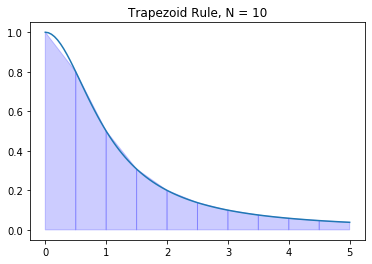

In [9]:
f = lambda x : 1/(1 + x**2)
a = 0; b = 5; N = 10

# x and y values for the trapezoid rule
x = np.linspace(a,b,N+1)
y = f(x)

# X and Y values for plotting y=f(x)
X = np.linspace(a,b,100)
Y = f(X)
plt.plot(X,Y)

for i in range(N):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)

plt.title('Trapezoid Rule, N = {}'.format(N))
plt.show()

Let's compute the sum of areas of the trapezoids:

In [10]:
T = trapz(f,a,b,N)
print(T)

1.3731040812301096


We know the exact value

$$
\int_0^5 \frac{1}{1 + x^2} dx = \arctan(5)
$$

and we can compare the trapezoid rule to the value

In [11]:
I = np.arctan(5)
print(I)

1.373400766945016


In [12]:
print("Trapezoid Rule Error:",np.abs(I - T))

Trapezoid Rule Error: 0.00029668571490626405


### Approximate ln(2)

Find a value $N$ which guarantees that the trapezoid rule approximation $T_N(f)$ of the integral

$$
\int_1^2 \frac{1}{x} \, dx = \ln(2)
$$

satisfies $E_N^T(f) \leq 10^{-8}$.

For $f(x) = \frac{1}{x}$, we compute $f''(x) = \frac{2}{x^3} \leq 2$ for all $x \in [1,2]$ therefore the error formula implies

$$
\left| \, \int_1^2 \frac{1}{x} \, dx - T_N(f) \, \right| \leq \frac{2}{12N^2}
$$

Then $E_N^T \leq 10^{-8}$ is guaranteed if $\frac{1}{6N^2} \leq 10^{-8}$ which implies

$$
\frac{10^4}{\sqrt{6}} \leq N
$$

In [13]:
10**4/np.sqrt(6)

4082.4829046386303

We need 4083 subintervals to guarantee $E_N^T(f) \leq 10^{-8}$. Compute the approximation using our own implementation of the trapezoid rule:

In [14]:
approximation = trapz(lambda x : 1/x,1,2,4083)
print(approximation)

0.6931471843089954


We could also use `scipy.integrate.trapz` to get the exact same result:

In [15]:
N = 4083
x = np.linspace(1,2,N+1)
y = 1/x
approximation = spi.trapz(y,x)
print(approximation)

0.6931471843089955


Let's verify that this is within $10^{-6}$:

In [16]:
np.abs(approximation - np.log(2)) < 10**(-8)

True

Success! However, a natural question arises: what is the actual smallest $N$ such that the trapezoid rule gives the estimate of $\ln (2)$ to within $10^{-8}$?

In [17]:
for n in range(1,4083):
    approx = trapz(lambda x : 1/x,1,2,n)
    if np.abs(approx - np.log(2)) < 10e-8:
        print("Accuracy achieved at N =",n)
        break

Accuracy achieved at N = 791


### Fresnel Integral

[Fresnel integrals](https://en.wikipedia.org/wiki/Fresnel_integral) are examples of [nonelementary integrals](https://en.wikipedia.org/wiki/Nonelementary_integral): antiderivatives which cannot be written in terms of [elementary functions](https://en.wikipedia.org/wiki/Elementary_function). There are two types of Fresnel integrals:

$$
S(t) = \int_0^t \sin(x^2) dx  \ \ \text{and} \ \ C(t) = \int_0^t \cos(x^2) dx
$$

Use the trapezoid rule to approximate the Fresnel integral

$$
S(1) = \int_0^1 \sin(x^2) dx
$$

such that the error is less than $10^{-5}$.

Compute the derivatives of the integrand

$$
f(x) = \sin(x^2) \ \ , \ \ f'(x) = 2x\cos(x^2)
$$

$$
f''(x) = 2\cos(x^2) - 4x^2\sin(x^2) \ \ , \ \ f'''(x) = -12x\sin(x^2) - 8x^3\cos(x^2)
$$

Since $f'''(x) \leq 0$ for $x \in [0,1]$, we see that $f''(x)$ is decreasing on $[0,1]$. Values of $f''(x)$ at the endpoints of the interval are

In [18]:
x = 0
2*np.cos(x**2) - 4*x**2*np.sin(x**2)

2.0

In [19]:
x = 1
2*np.cos(x**2) - 4*x**2*np.sin(x**2)

-2.2852793274953065

Therefore $\left| \, f''(x) \, \right| \leq 2.2852793274953065$ for $x \in [0,1]$. Use the error bound formula to find a good choice for $N$

$$
\frac{(b-a)^3}{12 N^2} K_2 \leq 10^{-5} \Rightarrow \sqrt{\frac{10^5(2.2852793274953065)}{12}} \leq N
$$

In [20]:
np.sqrt(10**5 * 2.2852793274953065 / 12)

137.9999796949051

Let's compute the integral using the trapezoid rule with $N=138$ subintervals

In [21]:
x = np.linspace(0,1,139)
y = np.sin(x**2)
I = spi.trapz(y,x)
print(I)

0.31027303032220394


Therefore the Fresnel integral $S(1)$ is approximately

$$
S(1) = \int_0^1 \sin(x^2) \, dx \approx 0.310273030322
$$

with error less than $10^{-5}$.

### Logarithmic Integral

The [Eulerian logarithmic integral](https://en.wikipedia.org/wiki/Logarithmic_integral_function) is another nonelementary integral

$$
\mathrm{Li}(t) = \int_2^t \frac{1}{\ln x} dx
$$

Let's compute $Li(10)$ such that the error is less than $10^{-4}$. Compute derivatives of the integrand

$$
f(x) = \frac{1}{\ln x} \ \ , \ \   f'(x) = -\frac{1}{x(\ln x)^2} \ \ , \ \  f''(x) = \frac{\ln x + 2 }{x^2(\ln x)^3}
$$

Plot $f''(x)$ on the interval $[2,10]$.

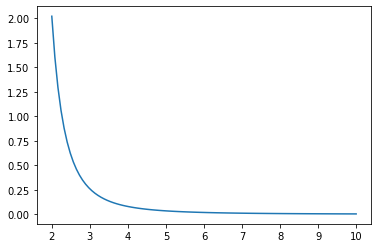

In [22]:
a = 2
b = 10
x = np.linspace(a,b,100)
y = (np.log(x) + 2) / (x**2 * np.log(x)**3)
plt.plot(x,y)
plt.show()

Clearly $f''(x)$ is decreasing on $[2,10]$ (and bounded below by 0) therefore the absolute maximum occurs at the left endpoint:

$$
\left| \, f''(x) \, \right| \leq \frac{\ln (2) + 2}{4 \ln (2)^3}
$$

for $x \in [2,10]$ and we compute

In [23]:
K2 = (np.log(2) + 2)/(4*np.log(2)**3)
print(K2)

2.021732598829855


Use the error formula:

$$
\frac{(b-a)^3}{12 N^2} K_2 \leq 10^{-4} \Rightarrow \frac{8^3}{12 N^2} 2.021732598829855 \leq 10^{-4} \Rightarrow \sqrt{ \frac{8^3 10^4}{12} 2.021732598829855} \leq N
$$

In [24]:
np.sqrt(8**3 * 10**4 * 2.021732598829855 / 12)

928.7657986995814

Compute the trapzoid rule with $N=929$

In [25]:
N = 929
x = np.linspace(a,b,N+1)
y = 1/np.log(x)
I = spi.trapz(y,x)
print(I)

5.120442039184057


Therefore the Eulerian logarithmic integral is

$$
\mathrm{Li}(10) = \int_2^{10} \frac{1}{\ln x} dx \approx 5.121065367200469
$$

such that the error is less than $10^{-4}$.

## Exercises

1. Let $f(x) = x^x$ and note that

    $$
    f'(x) = x^{x} \left(\log{\left(x \right)} + 1\right) \ , \ f''(x) = x^{x} \left(\log{\left(x \right)} + 1\right)^{2} + x^{x-1}
    $$
    
    Plot the function $f''(x)$ and use that information to compute $T_N(f)$ for the integral
    
    $$
    \int_1^2 x^x \, dx
    $$
    
    such that $E_N^T(f) \leq 10^{-3}$.

2. Consider the integral

    $$
    \int_0^1 \ln(1+x^2) \, dx
    $$
    
    and note that
    
    $$
    f(x) = \ln(1 + x^2) \hspace{1in} f'(x) = \frac{2x}{1 + x^2}
    $$
    $$
    f''(x) = 2 \left( \frac{1 - x^2}{1 + x^2} \right) \hspace{1in} f'''(x) = 4x \frac{x^2 - 3}{(x^2 + 1)^3}
    $$
    
    **Without plotting the functions** $f(x)$, $f'(x)$, $f''(x)$ or $f'''(x)$, find a value $N$ such that $E_N^T(f) \leq 10^{-6}$.